# An introduction to Fourier Analysis

In this section, we introduce the basics of Fourier series and Fourier transforms. Fourier analysis allows us to represent functions (signals) in terms of sinusoids—sines and cosines—with different frequencies, amplitudes, and phases.

Key ideas include:
- **Fourier Series:** For periodic functions, we can express a function as a sum of sinusoidal functions (harmonics).  
- **Fourier Transform:** For aperiodic functions or signals in a continuous domain, the Fourier transform provides a representation in the frequency domain.

Below, you'll find two examples:
1. A **Fourier Series Example** that approximates a square wave.
2. A **Fourier Transform Example** that computes and plots the Fourier transform of a Gaussian function.


## Fourier Series Example: Approximating a Square Wave

A square wave is a classic example of a function with discontinuities. Its Fourier series representation converges to the function almost everywhere (except at the discontinuities where the [Gibbs](https://en.wikipedia.org/wiki/Gibbs_phenomenon) phenomenon may occur). In this example, we'll compute a truncated Fourier series for a square wave.


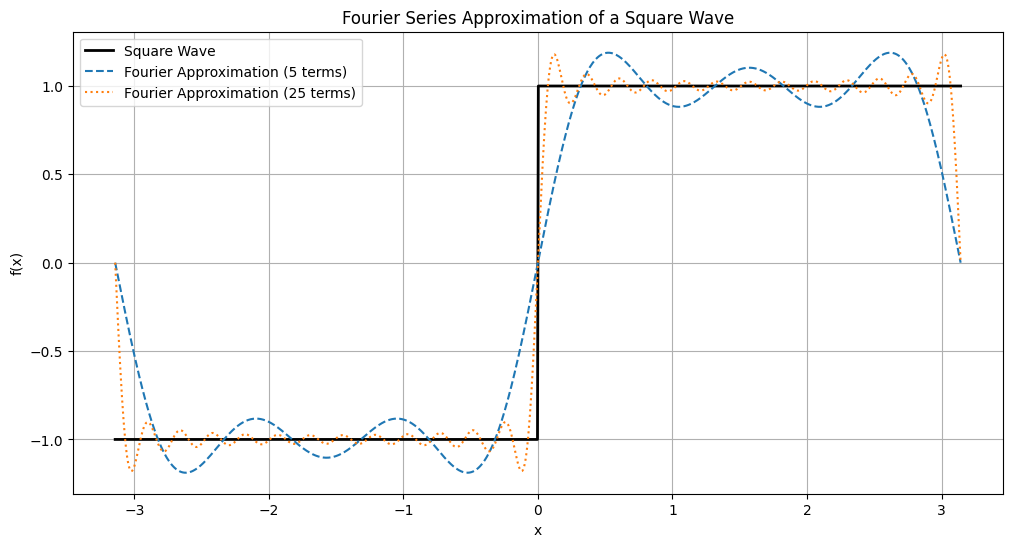

In [3]:
# Fourier Series Approximation for a Square Wave

import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function.
def square_wave(x):
    # The square wave is 1 when sin(x) >= 0, and -1 otherwise.
    return np.where(np.sin(x) >= 0, 1.0, -1.0)

# Define the Fourier series approximation function.
def fourier_series_square_wave(x, num_terms):
    # Initialize the series sum.
    approx = np.zeros_like(x)
    # Only odd harmonics contribute in the Fourier series of a square wave.
    for n in range(1, num_terms + 1, 2):
        approx += (4 / (np.pi * n)) * np.sin(n * x)
    return approx

# Create an array of x values.
x = np.linspace(-np.pi, np.pi, 1000)
true_wave = square_wave(x)

# Compute Fourier series approximations for different numbers of terms.
approx_5 = fourier_series_square_wave(x, 5)
approx_25 = fourier_series_square_wave(x, 25)

# Plot the true square wave and the Fourier series approximations.
plt.figure(figsize=(12, 6))
plt.plot(x, true_wave, label="Square Wave", color="black", linewidth=2)
plt.plot(x, approx_5, label="Fourier Approximation (5 terms)", linestyle="--")
plt.plot(x, approx_25, label="Fourier Approximation (25 terms)", linestyle=":")
plt.title("Fourier Series Approximation of a Square Wave")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


## Fourier Transform, Inverse Transform, and Frequency Spectrum: Gaussian Function

In this example we:
1. Define a Gaussian function.
2. Compute its Fourier transform using FFT.
3. Plot the frequency spectrum (magnitude of the Fourier transform).
4. Use the inverse FFT (IFFT) to recover the original function.

The three subplots show:
- The original Gaussian in the spatial domain.
- The magnitude of the Fourier transform (frequency domain).
- The recovered Gaussian function via IFFT.


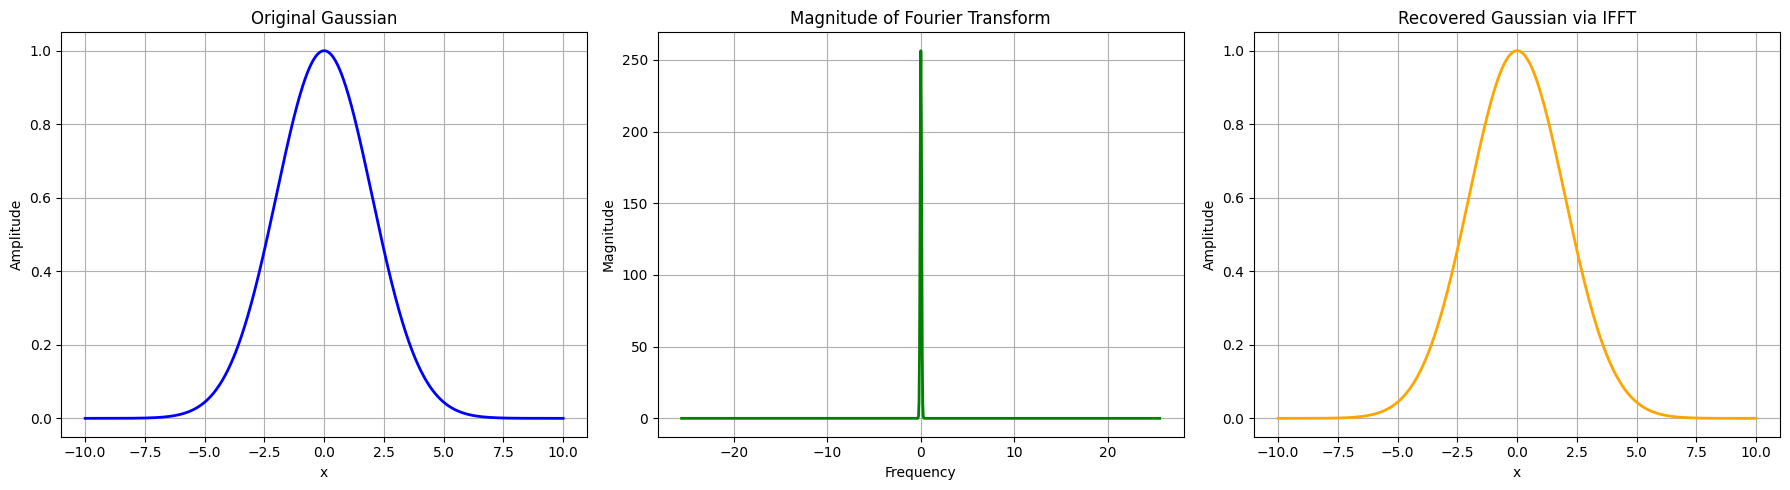

In [6]:
# Fourier Transform, Inverse Transform, and Frequency Spectrum of a Gaussian Function

import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian function.
def gaussian(x, mu=0, sigma=1):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

# Set up the spatial domain.
x = np.linspace(-10, 10, 1024)
y_original = gaussian(x, sigma=2)

# Compute the FFT of the Gaussian function.
Y = np.fft.fft(y_original)
# Create an array of corresponding frequencies.
dt = x[1] - x[0]
freq = np.fft.fftfreq(len(x), d=dt)

# Shift the FFT for plotting the spectrum.
Y_shifted = np.fft.fftshift(Y)
freq_shifted = np.fft.fftshift(freq)

# Compute the magnitude of the Fourier transform.
Y_magnitude = np.abs(Y_shifted)

# Now perform the Inverse FFT to recover the original signal.
y_recovered_complex = np.fft.ifft(Y)
y_recovered = np.real(y_recovered_complex)  # Removing small imaginary parts

# Create a 1x3 subplot for visualization.
plt.figure(figsize=(18, 5))

# Plot the original Gaussian function.
plt.subplot(1, 3, 1)
plt.plot(x, y_original, color="blue", linewidth=2)
plt.title("Original Gaussian")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the Fourier spectrum: magnitude of the FFT.
plt.subplot(1, 3, 2)
plt.plot(freq_shifted, Y_magnitude, color="green", linewidth=2)
plt.title("Magnitude of Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid(True)

# Plot the recovered Gaussian after inverse FFT.
plt.subplot(1, 3, 3)
plt.plot(x, y_recovered, color="orange", linewidth=2)
plt.title("Recovered Gaussian via IFFT")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


## Applying FFT to a Continuous Signal and Estimating its Power Spectrum

In many practical applications, you will need to identify the dominant frequencies of a continuous signal that has been corrupted by noise. In this example, we start with a continuous signal composed of two sine waves, add uncorrelated (white) noise to it, and then use the FFT and Welch's method to analyze its frequency content.

### Signal Description

The continuous signal is defined as:

$$
x(t) = \sin(2\pi f_1 t) + 0.5 \, \sin(2\pi f_2 t),
$$

with $f_1 = 50\,\text{Hz}$ and $f_2 = 120\,\text{Hz}$. We then add uncorrelated (white) noise to this signal. The task becomes identifying the dominant frequencies (which should correspond to the sine wave components) even in the presence of noise.

### Analysis Approach

1. **Sampling:**  
   A continuous signal is first sampled at a high frequency (e.g., $f_s = 1000\,\text{Hz}$) to create a discrete signal.

2. **FFT Application:**  
   The Fast Fourier Transform (FFT) is applied to the sampled signal to break it down into its constituent frequency modes.

3. **PSD Estimation Using Welch's Method:**  
   MATLAB's `pwelch` function is analogous to Python's `scipy.signal.welch`, which estimates the Power Spectral Density (PSD) of a signal. Welch's method improves the robustness of the frequency estimate by averaging periodograms over segments of the signal.

The following code demonstrates these steps.


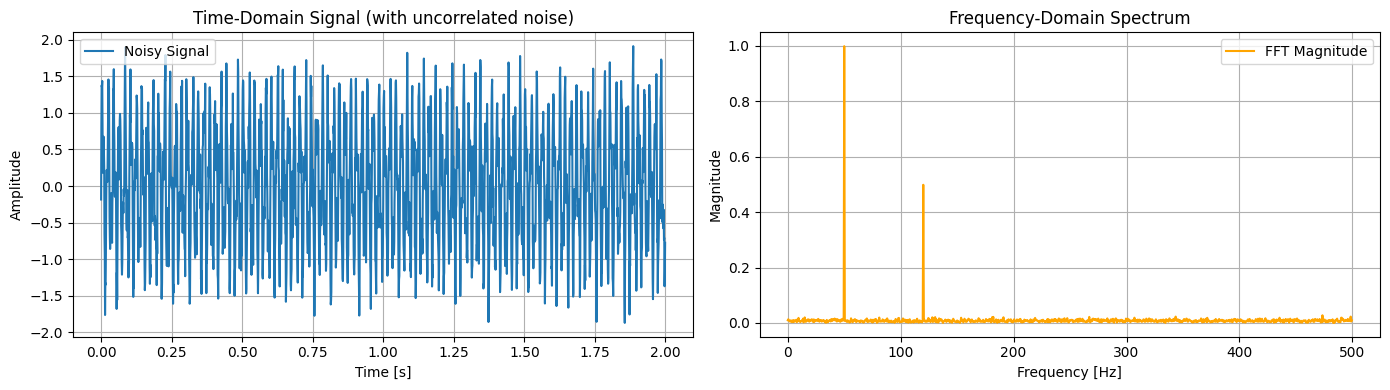

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Define sampling parameters
fs = 1000  # Sampling frequency in Hz
T = 2.0    # Total duration in seconds
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Time vector

# Define the signal: two sine waves
f1 = 50   # Frequency of the first sine wave in Hz
f2 = 120  # Frequency of the second sine wave in Hz
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Add uncorrelated (white) noise to the signal.
# This noise is uncorrelated with the signal components.
noise = 0.2 * np.random.randn(len(t))
signal_noisy = signal + noise

# Compute the FFT of the noisy signal.
fft_result = np.fft.fft(signal_noisy)
n = len(signal_noisy)
freqs = np.fft.fftfreq(n, 1/fs)

# For plotting, keep only the positive frequencies.
positive_freqs = freqs[:n // 2]
fft_magnitude = (2.0/n) * np.abs(fft_result[:n // 2])

# Plot the noisy signal and its FFT spectrum.
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(t, signal_noisy, label='Noisy Signal')
plt.title("Time-Domain Signal (with uncorrelated noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(positive_freqs, fft_magnitude, label='FFT Magnitude', color='orange')
plt.title("Frequency-Domain Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


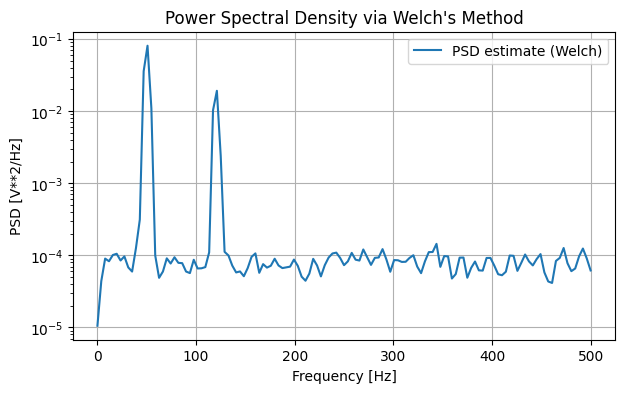

In [13]:

# -----------------------------
# Estimate Power Spectral Density (PSD) using Welch's Method
# -----------------------------
f_welch, Pxx = welch(signal_noisy, fs, nperseg=256)

plt.figure(figsize=(7, 4))
plt.semilogy(f_welch, Pxx, label='PSD estimate (Welch)')
plt.title("Power Spectral Density via Welch's Method")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [V**2/Hz]")
plt.legend()
plt.grid(True)
plt.show()


## 2. Computational Fourier Analysis: The FFT

The Fast Fourier Transform (FFT) is an algorithm that computes the Discrete Fourier Transform (DFT) rapidly. Its computational cost is reduced from 
$$
O(n^2)
$$ 
to 
$$
O(n\log n).
$$

### How the FFT Works

The FFT exploits properties such as symmetry and periodicity inherent in the DFT. One common approach is the decimation-in-time algorithm, which recursively breaks down a DFT of size $n$ into many smaller DFTs. This approach is very efficient for sequences where $n$ is a power of two, although FFT algorithms have been generalized to arbitrary lengths. Keep in mind that FFT-based methods assume the signal is periodic, and this assumption may require extra care (such as windowing or zero-padding) when applied to non-periodic data.

### Applications of the FFT

The FFT is highly useful in many engineering applications:
- **Spectral Analysis and Signal Processing:** Decomposing signals into frequency components.
- **Filtering:** Removing unwanted noise or extracting specific frequency bands.
- **Fast Convolution:** Leveraging the convolution theorem to perform convolution via frequency-domain multiplication.
- **Spectral Differentiation:** Solving differential equations using methods like spectral collocation, where derivatives are computed efficiently in the Fourier domain.

Below are four examples that illustrate these aspects.


### Example 1: Basic FFT of a Periodic Signal

In this example, we generate a simple periodic signal (a sum of sine waves) and apply the FFT to break it down into its frequency modes. This demonstrates how the FFT reveals the spectral content of the signal.

$$
x(t) = \sin(2\pi f_1 t) + 0.5 \, \sin(2\pi f_2 t)
$$

where $f_1$ and $f_2$ are the frequencies of the sine components.


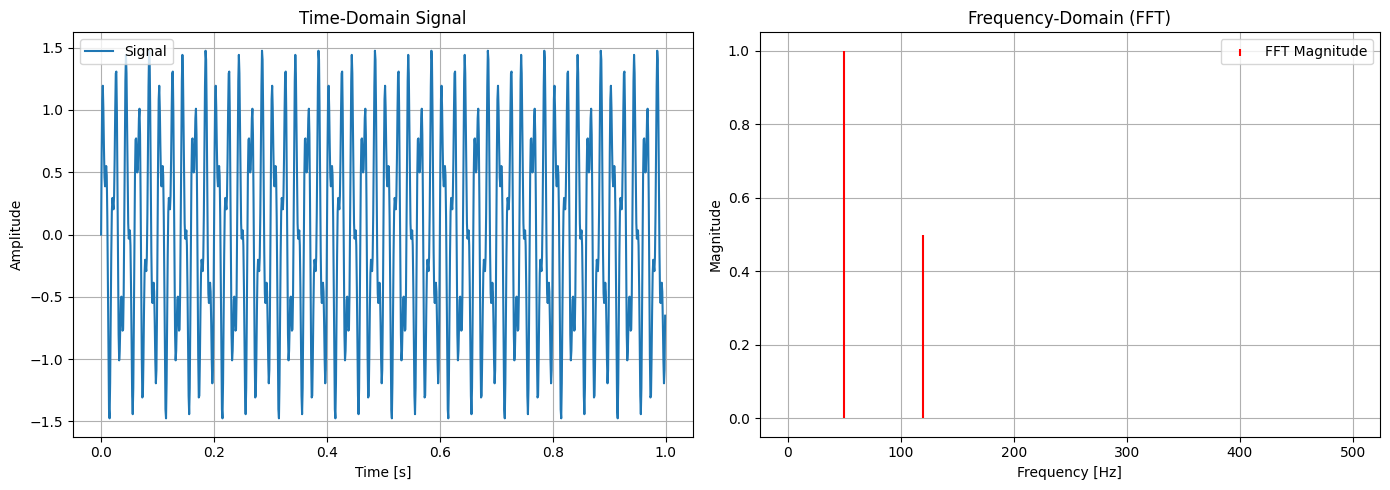

In [15]:
# Example 1: Breaking Down a Periodic Signal into Frequency Components

import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 1000  # Sampling frequency (Hz)
T = 1.0    # Total duration (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Frequencies for the sine waves
f1 = 50    # Frequency of first sine component (Hz)
f2 = 120   # Frequency of second sine component (Hz)

# Create a signal that is a sum of sine waves
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# Compute FFT
fft_signal = np.fft.fft(signal)
n = len(signal)
freqs = np.fft.fftfreq(n, 1/fs)

# Extract positive frequencies for plotting
positive_freqs = freqs[:n // 2]
fft_magnitude = (2.0/n) * np.abs(fft_signal[:n // 2])

# Plot time domain and frequency domain representations
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(t, signal, label='Signal')
plt.title("Time-Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.stem(positive_freqs, fft_magnitude, 'r', markerfmt=" ", basefmt=" ")
plt.title("Frequency-Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend(["FFT Magnitude"])
plt.tight_layout()
plt.show()


### Example 2: Filtering Using the FFT

The FFT can be used to filter a signal by manipulating its frequency components. For example, we can create a low-pass filter by zeroing out frequencies above a certain threshold and then applying the inverse FFT to obtain the filtered signal in the time domain.

$$
Y(f) = \begin{cases}
\text{FFT}\{x(t)\}(f), & |f| < f_c \\
0, & |f| \ge f_c
\end{cases}
$$

where $f_c$ is the cutoff frequency.


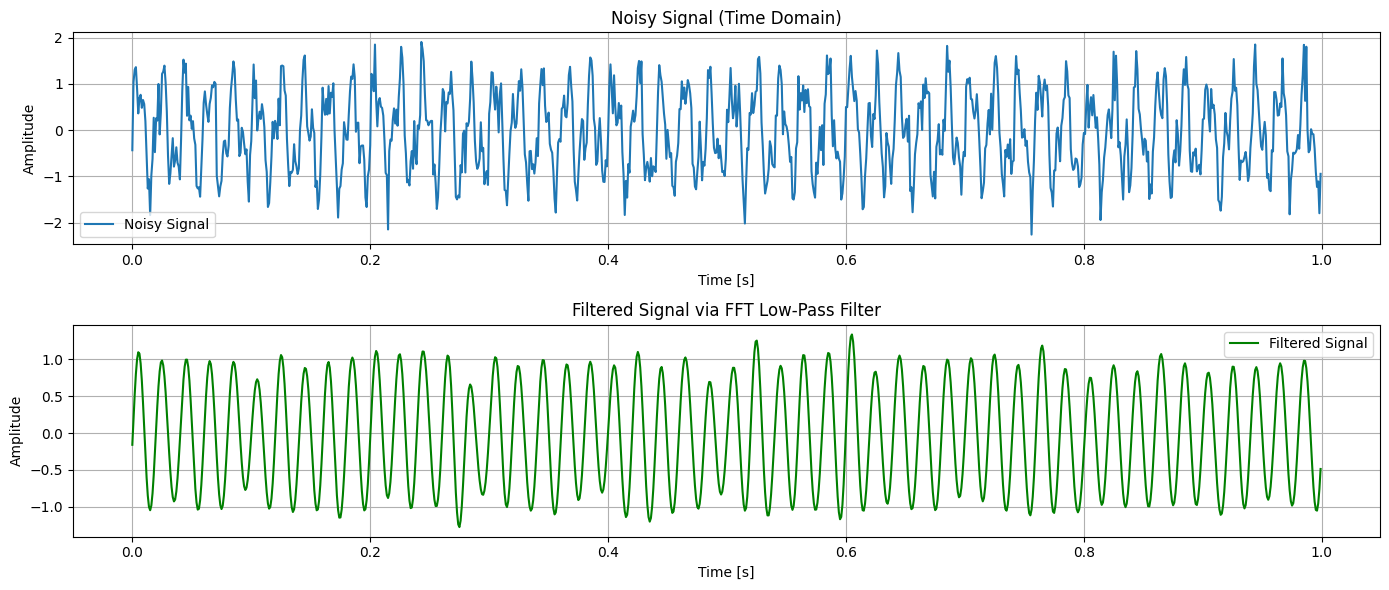

In [17]:
# Example 2: Filtering a Signal Using the FFT

import numpy as np
import matplotlib.pyplot as plt

# Use the signal from Example 1 (or define a new one)
# We'll add some noise for the filtering demonstration.
noise = 0.3 * np.random.randn(len(t))
signal_noisy = signal + noise

# Compute FFT of the noisy signal.
fft_signal_noisy = np.fft.fft(signal_noisy)
n = len(signal_noisy)
freqs = np.fft.fftfreq(n, 1/fs)

# Define cutoff frequency for low-pass filter.
fc = 80  # Cutoff frequency in Hz

# Create a mask that filters out frequencies above fc.
filter_mask = np.abs(freqs) < fc

# Apply the low-pass filter in the frequency domain.
fft_filtered = fft_signal_noisy * filter_mask

# Apply inverse FFT to get the filtered signal.
signal_filtered = np.fft.ifft(fft_filtered).real

# Plot the noisy signal and filtered signal.
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal_noisy, label='Noisy Signal')
plt.title("Noisy Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, signal_filtered, label='Filtered Signal', color='green')
plt.title("Filtered Signal via FFT Low-Pass Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Example 3: Fast Convolution Using the FFT

The convolution theorem states that convolution in the time domain is equivalent to multiplication in the frequency domain:

$$
\mathcal{F}\{f * g\}(k) = \hat{f}(k) \cdot \hat{g}(k).
$$

By zero-padding the signals to avoid circular convolution, the FFT can be used to compute convolutions very efficiently. This is especially useful when dealing with large signals.

Below, we illustrate how to perform fast convolution on two signals.


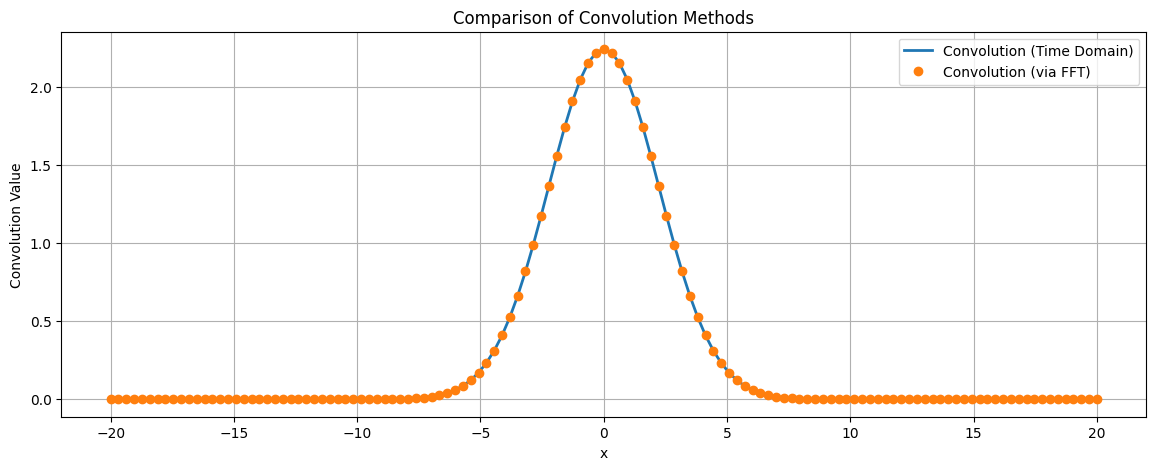

In [9]:
# Example 3: Fast Convolution Using FFT

import numpy as np
import matplotlib.pyplot as plt

# Define two functions/signals (here we use Gaussians for illustration).
def gaussian(x, mu=0, sigma=1):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

N = 64
x_conv = np.linspace(-10, 10, N)
f_signal = gaussian(x_conv, sigma=1)
g_signal = gaussian(x_conv, sigma=2)

# Compute convolution via np.convolve (time-domain) - linear convolution.
conv_time = np.convolve(f_signal, g_signal, mode='full') * (x_conv[1] - x_conv[0])
x_conv_full = np.linspace(2*x_conv[0], 2*x_conv[-1], len(conv_time))

# Zero-pad signals for FFT convolution.
L = len(conv_time)
f_pad = np.zeros(L)
g_pad = np.zeros(L)
f_pad[:N] = f_signal
g_pad[:N] = g_signal

# FFT of zero-padded signals.
F_fft = np.fft.fft(f_pad)
G_fft = np.fft.fft(g_pad)

# Multiply in frequency domain and take inverse FFT.
conv_fft = np.fft.ifft(F_fft * G_fft) * (x_conv[1] - x_conv[0])
conv_fft = np.real(conv_fft)

# Plot both convolution results.
plt.figure(figsize=(14, 5))

plt.plot(x_conv_full, conv_time, label='Convolution (Time Domain)', linewidth=2)
plt.plot(x_conv_full, conv_fft, 'o', label='Convolution (via FFT)', linewidth=2)
plt.title("Comparison of Convolution Methods")
plt.xlabel("x")
plt.ylabel("Convolution Value")
plt.legend()
plt.grid(True)
plt.show()


### Example 4: Spectral Differentiation for a Periodic Function Using FFT

In spectral collocation methods, a function $ u(x) $ with period $2\pi$ can be represented as a Fourier series, and its derivative is given by

$$
\frac{du}{dx}(x) = \sum_{k=-\infty}^{\infty} i k \, \hat{u}_k \, e^{ikx},
$$

where $ \hat{u}_k $ are the Fourier coefficients. To compute the derivative using FFT:
- Compute the FFT of $ u(x) $.
- Multiply each Fourier coefficient by $ i k $ (where $ k $ are the corresponding integer wave numbers).
- Compute the inverse FFT to get the derivative.

The key is to correctly define the wave numbers $ k $ for a periodic domain on $[0,2\pi]$. For a discretization with $N$ points, the wave number array is given by:

$$
k = \Big[0, 1, 2, \dots, \frac{N}{2}-1, -\frac{N}{2}, -\frac{N}{2}+1, \dots, -1\Big].
$$

> The wavenumbers are ordered this way because it aligns with the inherent structure of the FFT algorithm, optimizing efficiency even though it may initially seem non-intuitive compared to a simple sorted order.

Below is the updated Python code.


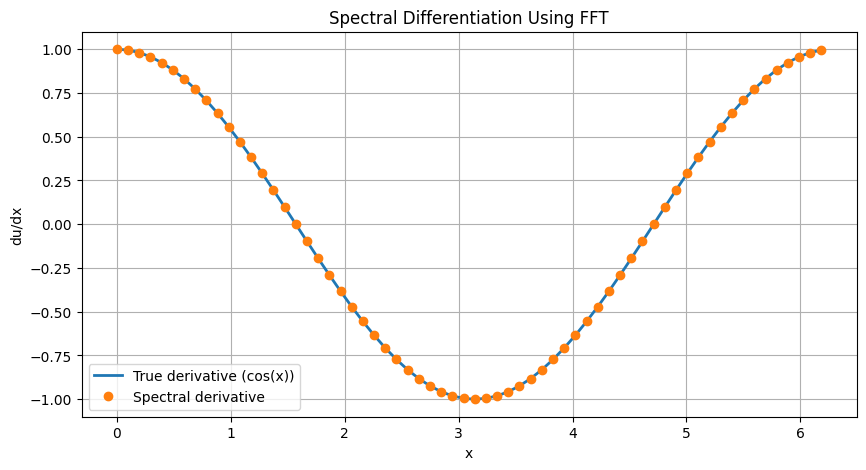

In [23]:
# Example 4 (Revised): Spectral Differentiation Using FFT

import numpy as np
import matplotlib.pyplot as plt

# Number of sample points and domain: [0, 2pi)
N = 64
x = np.linspace(0, 2*np.pi, N, endpoint=False)
u = np.sin(x)  # Define a periodic function u(x) = sin(x)

# Compute FFT of u(x)
u_fft = np.fft.fft(u)

# Correct wave number array for a periodic domain of length 2pi:
# For N points, the wave numbers k are:
k = np.concatenate((np.arange(0, N//2), np.arange(-N//2, 0)))

# Compute the Fourier transform of the derivative: du/dx
du_fft = 1j * k * u_fft

# Compute the inverse FFT to obtain the derivative in the spatial domain.
du_approx = np.fft.ifft(du_fft).real

# The analytical derivative of sin(x) is cos(x)
du_true = np.cos(x)

# Plot the results: the spectral derivative vs. the true derivative.
plt.figure(figsize=(10, 5))
plt.plot(x, du_true, label="True derivative (cos(x))", linewidth=2)
plt.plot(x, du_approx, 'o', label="Spectral derivative", linewidth=2)
plt.title("Spectral Differentiation Using FFT")
plt.xlabel("x")
plt.ylabel("du/dx")
plt.legend()
plt.grid(True)
plt.show()


## Parseval's Theorem

Parseval's theorem is a fundamental result in Fourier analysis that establishes the equivalence between the total *energy* of a signal in the time domain and the total energy of its Fourier transform in the frequency domain. For discrete signals, Parseval's theorem can be stated as follows:

$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2,
$$

where:
- $x[n]$ is the discrete time-domain signal,
- $X[k] = \texttt{np.fft.fft}(x)$ is its discrete Fourier transform,
- $N$ is the number of sample points.

### Practical explanation

1. **Signal Definition:**  
   A time-domain signal $x[n]$ is defined as a sum of two sine waves with frequencies of 50 Hz and 120 Hz, plus a small amount of added noise for realism. This signal serves as a practical example for demonstrating energy conservation between the time and frequency domains.

2. **Energy in Time Domain:**  
   The total energy of the signal in the time domain is computed by summing the squared magnitudes of its samples:

   $$
   E_{\text{time}} = \sum_{n=0}^{N-1} |x[n]|^2.
   $$

3. **FFT and Energy in Frequency Domain:**  
   The Fourier transform $X[k]$ of $x[n]$ is computed using NumPy's `np.fft.fft`. According to Parseval's theorem, the energy in the frequency domain is given by

   $$
   E_{\text{freq}} = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2.
   $$

   In practice, this means that when you compute the FFT of a signal, the sum of the squared magnitudes of the Fourier coefficients, after scaling by $1/N$, should equal the sum of the squared magnitudes in the time domain.

4. **Plots:**  
   Two plots are typically provided to illustrate this:
   
   - The first plot shows the time-domain signal.
   - The second plot shows its normalized magnitude spectrum (i.e., $|X[k]|/N$) for the positive frequencies.

This example demonstrates that the energy computed in the time domain equals the appropriately scaled energy computed in the frequency domain, confirming Parseval's theorem in action.


Energy in time domain:  327.72184151636844
Energy in frequency domain:  327.72184151636844


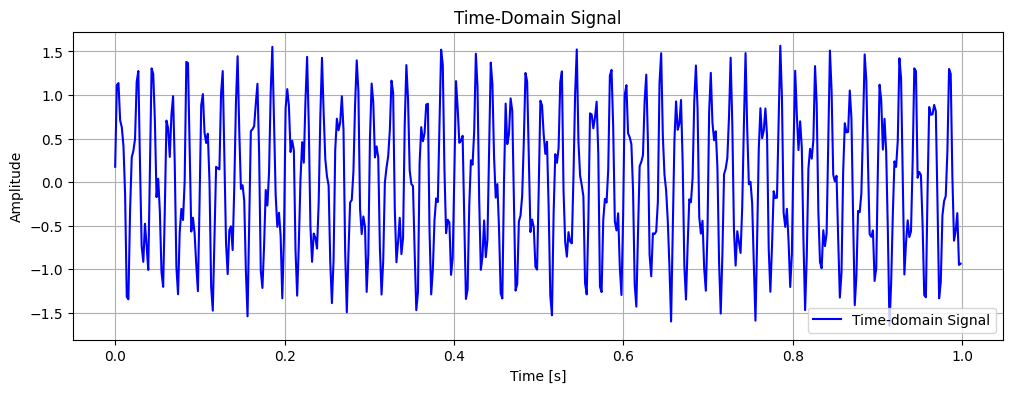

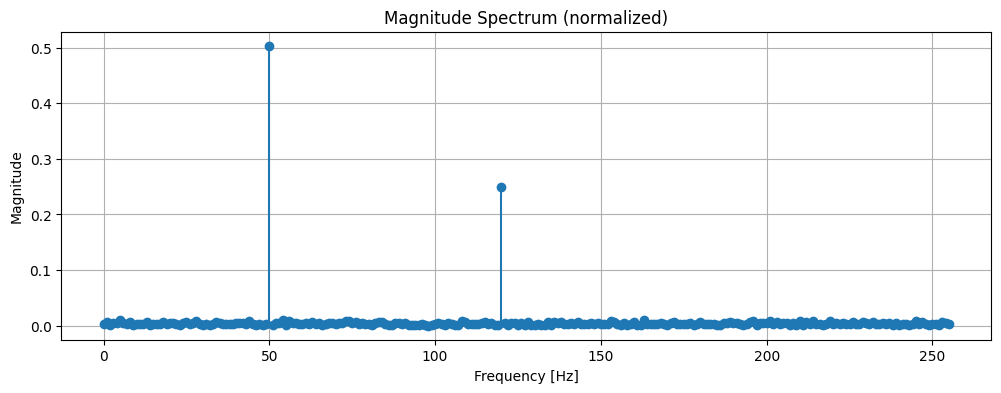

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility.
np.random.seed(0)

# Define parameters.
N = 512                  # Number of sample points.
T = 1.0                  # Total time duration in seconds.
dt = T / N               # Time resolution.
t = np.linspace(0, T, N, endpoint=False)  # Time vector.

# Create a signal in time domain: a sum of two sine waves plus a little noise.
f1 = 50   # Frequency in Hz.
f2 = 120  # Frequency in Hz.
x = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.1 * np.random.randn(N)

# Compute the energy in the time domain.
energy_time = np.sum(np.abs(x)**2)
print("Energy in time domain: ", energy_time)

# Compute the FFT of the signal.
X = np.fft.fft(x)

# Compute the energy in the frequency domain (with proper normalization).
# Note: NumPy's FFT does not include a 1/N factor, so we divide by N.
energy_freq = np.sum(np.abs(X)**2) / N
print("Energy in frequency domain: ", energy_freq)

# Plot the signal in time domain.
plt.figure(figsize=(12, 4))
plt.plot(t, x, 'b-', label='Time-domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal')
plt.legend()
plt.grid(True)
plt.show()

# Plot the magnitude spectrum (for positive frequencies).
freqs = np.fft.fftfreq(N, dt)
# Only take the positive half.
positive_indices = freqs >= 0
plt.figure(figsize=(12, 4))
plt.stem(freqs[positive_indices], np.abs(X)[positive_indices] / N, basefmt=" ")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (normalized)')
plt.grid(True)
plt.show()


## Aliasing and Anti-Aliasing

Aliasing is a phenomenon that occurs when a continuous signal is sampled at too low a rate, causing high-frequency components to "fold" into lower frequencies. This is due to the Nyquist–Shannon sampling theorem, which states that to accurately sample a signal without aliasing, the sampling frequency $f_s$ must be at least twice the highest frequency present in the signal ($f_s \geq 2f_{\text{max}}$). If this condition is not met, frequencies above $f_s/2$ will be misinterpreted as lower frequencies.

In this section, we first demonstrate aliasing with examples and then introduce anti-aliasing techniques.


### Example 1: Demonstration of Aliasing

In this example, we generate a continuous sine wave with a frequency higher than half the sampling rate (the Nyquist frequency). When sampled, the resulting discrete signal will show an alias frequency (a lower frequency) rather than the actual input frequency.

Consider a sine wave:
$$
x(t) = \sin(2\pi f t),
$$
with the true frequency $f$. If we sample at a frequency $f_s$, the aliased frequency can be expressed as
$$
f_{\text{alias}} = |f - N f_s|,
$$
where $N$ is an integer chosen to bring $f_{\text{alias}}$ into the interval $[0, f_s/2]$.

Below we choose a sine wave frequency above $f_s/2$ and visualize both the continuous signal and the aliased sampled points.


True frequency: 75 Hz
Aliased frequency: 25 Hz


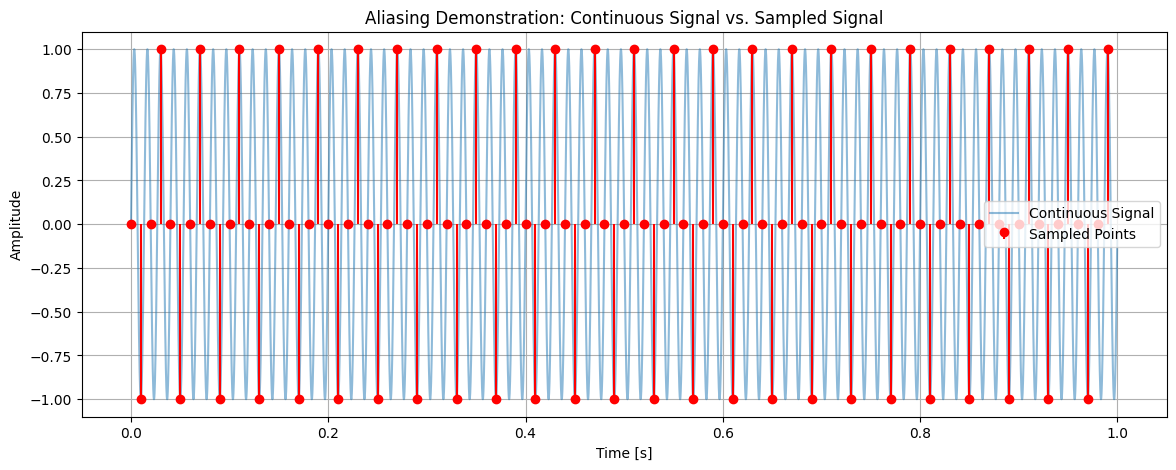

In [25]:
# Example 1: Aliasing of a Sine Wave

import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 100        # Sampling frequency in Hz
T = 1           # Duration of the signal in seconds
t_continuous = np.linspace(0, T, 10000, endpoint=False)  # High resolution for continuous signal

# Define a sine wave with a frequency greater than fs/2.
f_true = 75     # True frequency in Hz (Note: fs/2 = 50 Hz, so aliasing occurs)
signal_continuous = np.sin(2 * np.pi * f_true * t_continuous)

# Sample the signal at sampling frequency fs.
t_sampled = np.linspace(0, T, int(fs * T), endpoint=False)
signal_sampled = np.sin(2 * np.pi * f_true * t_sampled)

# Compute the alias frequency.
# Here, the alias frequency is |f_true - fs| if f_true > fs/2.
f_alias = abs(f_true - fs)

print(f"True frequency: {f_true} Hz")
print(f"Aliased frequency: {f_alias} Hz")

# Plot the continuous signal and the sampled points.
plt.figure(figsize=(14, 5))
plt.plot(t_continuous, signal_continuous, label="Continuous Signal", alpha=0.5)
plt.stem(t_sampled, signal_sampled, linefmt='r-', markerfmt='ro', basefmt=" ", label="Sampled Points")
plt.title("Aliasing Demonstration: Continuous Signal vs. Sampled Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


### Example 2: Visualizing the Frequency Spectrum Under Aliasing

When a signal is aliased, its FFT reveals peaks at the wrong (aliased) frequencies. In the following example, we compute the FFT of a noisy signal whose frequency content is aliased. Note that the FFT magnitude will display a peak corresponding to the aliased frequency rather than the true frequency.

Run the following code to see the FFT-based frequency spectrum.


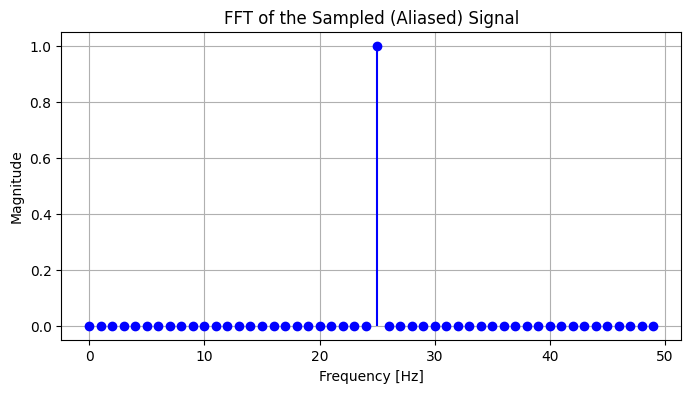

In [26]:
# Example 2: FFT of an Aliased Signal

# Compute FFT of the aliased (sampled) signal from Example 1.
n = len(signal_sampled)
fft_signal = np.fft.fft(signal_sampled)
freqs = np.fft.fftfreq(n, 1/fs)

# Only consider the positive frequencies.
positive_freqs = freqs[:n//2]
fft_magnitude = (2.0/n) * np.abs(fft_signal[:n//2])

plt.figure(figsize=(8, 4))
plt.stem(positive_freqs, fft_magnitude, 'b', markerfmt="bo", basefmt=" ")
plt.title("FFT of the Sampled (Aliased) Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


#### Example 3: Increasing the Sampling Frequency

By increasing the sampling frequency, the Nyquist rate is raised. In the following example, we sample the same sine wave with a higher sampling rate so that aliasing is avoided.


High sampling rate: 300 Hz, Nyquist frequency: 150.0 Hz


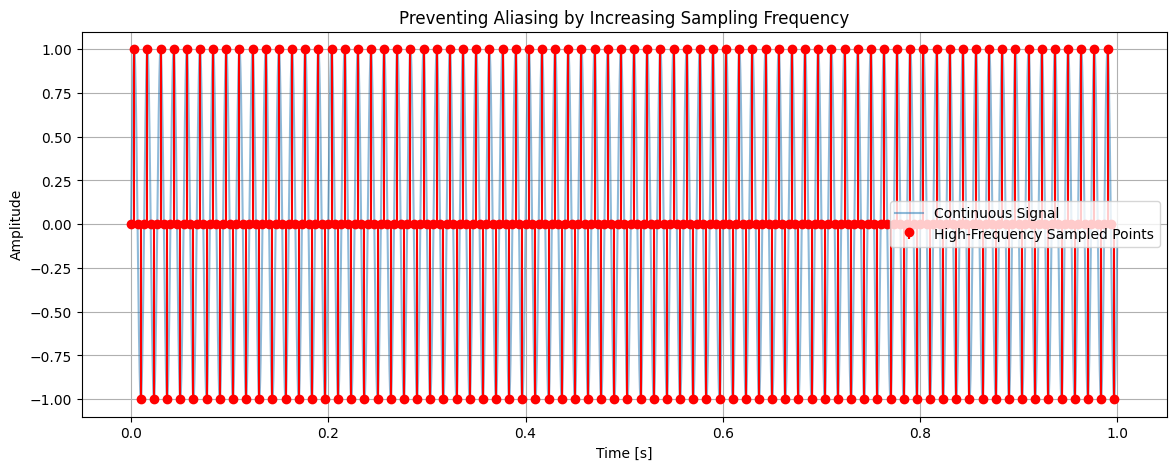

In [32]:
# Example 3: High Sampling Frequency to Prevent Aliasing

fs_high = 300  # Higher sampling frequency (Hz)
t_sampled_high = np.linspace(0, T, int(fs_high * T), endpoint=False)
signal_sampled_high = np.sin(2 * np.pi * f_true * t_sampled_high)

# Determine Nyquist frequency for fs_high
nyquist_high = fs_high / 2
print(f"High sampling rate: {fs_high} Hz, Nyquist frequency: {nyquist_high} Hz")

plt.figure(figsize=(14, 5))
plt.plot(t_continuous, signal_continuous, label="Continuous Signal", alpha=0.5)
plt.stem(t_sampled_high, signal_sampled_high, linefmt='r-', markerfmt='ro', basefmt=" ", label="High-Frequency Sampled Points")
plt.title("Preventing Aliasing by Increasing Sampling Frequency")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

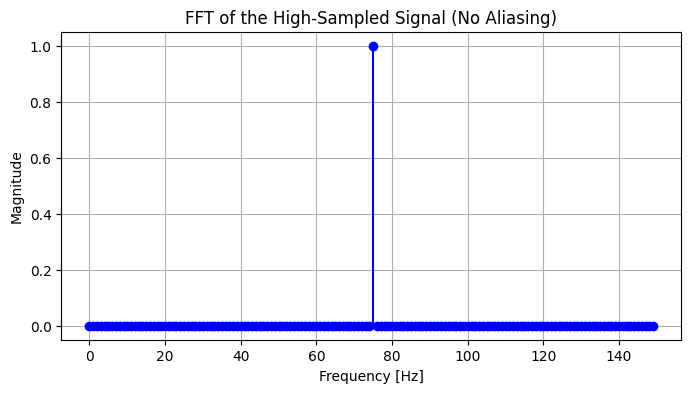

In [33]:
# Compute FFT of the high-sampled signal.
n_high = len(signal_sampled_high)
fft_signal_high = np.fft.fft(signal_sampled_high)
freqs_high = np.fft.fftfreq(n_high, 1/fs_high)
positive_freqs_high = freqs_high[:n_high//2]
fft_magnitude_high = (2.0/n_high) * np.abs(fft_signal_high[:n_high//2])

plt.figure(figsize=(8, 4))
plt.stem(positive_freqs_high, fft_magnitude_high, 'b', markerfmt="bo", basefmt=" ")
plt.title("FFT of the High-Sampled Signal (No Aliasing)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()